In [1]:
# Unweighted Distance Network #

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import ArcGIS

import math

In [3]:
G = nx.DiGraph()
N=109

In [4]:
data_1= pd.read_csv(r'C:\Users\dell\Dropbox\My_RESOURCE\Transportation NETWORK\DATA_set\Nodes_Position.csv',encoding='cp1252')
a_list=data_1[['Label','latitude','longitude']].values.tolist()
a_list

[['Delhi', 28.567, 77.103],
 ['Mumbai', 19.089, 72.868],
 ['Kolkata', 22.655, 88.447],
 ['Chennai', 12.907, 80.122],
 ['Agartala', 23.887, 91.24],
 ['Agatti', 10.824, 72.176],
 ['Ahmedabad', 23.077, 72.635],
 ['Bhavnagar', 21.752, 72.185],
 ['Porbandar', 21.649, 69.657],
 ['Jamnagar', 22.466, 70.013],
 ['Rajkot', 22.309, 70.78],
 ['Bhuj', 23.288, 69.67],
 ['Kandla', 23.113, 70.1],
 ['Surat', 21.114, 72.742],
 ['Vadodara', 22.336, 73.226],
 ['Aizwal', 23.841, 92.62],
 ['Agra', 27.156, 77.961],
 ['Allahabad', 25.44, 81.734],
 ['Gorakhpur', 26.74, 83.45],
 ['Hindon', 28.708, 77.359],
 ['Kanpur', 26.441, 80.365],
 ['Lucknow', 26.761, 80.889],
 ['Varanasi', 25.452, 82.859],
 ['Adampur', 31.434, 75.759],
 ['Amritsar', 31.71, 74.797],
 ['Bathinda', 30.2715, 74.7458],
 ['Chandigarh', 30.673, 76.789],
 ['Bagdogra', 26.681, 88.329],
 ['Durgapur', 23.583, 87.34],
 ['Bangalore', 12.95, 77.668],
 ['Belgaum', 15.859, 74.618],
 ['Hubli', 15.362, 75.085],
 ['Mangalore', 12.961, 74.89],
 ['Vidyanagar',

In [5]:
for i in a_list :
    G.add_node(i[0], pos=(i[1],i[2]))

In [6]:
data_1= pd.read_csv(r'C:\Users\dell\Dropbox\My_RESOURCE\Transportation NETWORK\DATA_set\FLIGHT_PER_WK_CSV.csv',encoding='cp1252')
stf_list=data_1[['Source','Target','Distance (Km)']].values.tolist()
stf_list

[['Bangalore', 'Agartala', 1876.127499],
 ['Delhi', 'Agartala', 1501.792494],
 ['Guwahati', 'Agartala', 249.1927731],
 ['Imphal', 'Agartala', 286.1781205],
 ['Kolkata', 'Agartala', 316.475118],
 ['Cochin', 'Agatti', 468.055701],
 ['Aurangabad', 'Ahmedabad', 457.6388426],
 ['Bagdogra', 'Ahmedabad', 1631.807618],
 ['Bangalore', 'Ahmedabad', 1245.108848],
 ['Belgaum', 'Ahmedabad', 829.0447398],
 ['Bhavnagar', 'Ahmedabad', 154.4237389],
 ['Bhopal', 'Ahmedabad', 481.1696769],
 ['Bhubaneshwar', 'Ahmedabad', 1397.718078],
 ['Chandigarh', 'Ahmedabad', 939.5276775],
 ['Chennai', 'Ahmedabad', 1379.684312],
 ['Cochin', 'Ahmedabad', 1491.899683],
 ['Dehradun', 'Ahmedabad', 963.6418914],
 ['Delhi', 'Ahmedabad', 756.5583882],
 ['Diu', 'Ahmedabad', 316.8022227],
 ['Goa', 'Ahmedabad', 864.901087],
 ['Guwahati', 'Ahmedabad', 1943.636937],
 ['Hubli', 'Ahmedabad', 895.5309335],
 ['Hyderabad', 'Ahmedabad', 872.2568416],
 ['Indore', 'Ahmedabad', 326.9217614],
 ['Jabalpur', 'Ahmedabad', 758.4527283],
 ['Jai

In [7]:
for i in stf_list :
    G.add_edge(i[0], i[1], weight =i[2])

In [8]:
"""
weight1=nx.get_edge_attributes(G,'weight')
pos=nx.get_node_attributes(G,'pos')
pos"""

"\nweight1=nx.get_edge_attributes(G,'weight')\npos=nx.get_node_attributes(G,'pos')\npos"

In [9]:
#pip install pyvis

In [10]:
from pyvis.network import Network
from IPython.core.display import display, HTML
net=Network(height=1000, width=1500,directed=True)
net.from_nx(G)
net.show_buttons(filter_=['physics'])
net.show("example.html")

C:\Users\dell\AppData\Local\Temp\ipykernel_12744\3025061303.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [11]:
#data taking between airport for table 1 (shortest path)
from collections import defaultdict
list_wt_1_element=[]
list_wt_2_element=[]
list_wt_3_element=[]
list_wt_4_element=[]
list_wt_5_element=[]
list_wt_6_element=[]
list_wt_7_element=[]
new_lst_2=[]
##

list_wt_6_element=[]
for i in a_list:
    for j in a_list: 
       # print([p for p in nx.all_shortest_paths(G, source=i[0], target=j[0])])
        try:   
            shtst_pat_list=([p for p in nx.all_shortest_paths(G, source=i[0], target=j[0],weight='weight')])
            xxx=nx.shortest_path_length(G, source=i[0], target=j[0],weight='weight', method='dijkstra')
            print('Shortest path length',xxx)
            new_lst_2.append(xxx)
            
           # print(xxx)
            count = 0
            for listElem in shtst_pat_list:
                count += len(listElem)                    
                print('Total Number of elements : ', count)
                if count == 1:
                    list_wt_1_element.append(count)
                if count == 2:
                    list_wt_2_element.append(count)  
                if count == 3:
                    list_wt_3_element.append(count)
                if count == 4:
                    list_wt_4_element.append(count)
                if count == 5:
                    list_wt_5_element.append(count)
                if count == 6:
                    list_wt_6_element.append(count)
                if count == 7:
                    list_wt_7_element.append(count)
        except nx.exception.NetworkXNoPath:
            continue
print(" Nothing:",len(list_wt_1_element))
print(" without stopage:",len(list_wt_2_element))
print(" with 1 stopage:",len(list_wt_3_element))
print("with 2 stopage::",len(list_wt_4_element))
print("with 3 stopage: :",len(list_wt_5_element))
print("with 4 stopage: :",len(list_wt_6_element))
print("with 5 stopage: :",len(list_wt_7_element))

Shortest path length 0
Total Number of elements :  1
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Sh

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length

Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of 

Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of element

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 1
Total Number of elements :  2
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest 

Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total

Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Tota

Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Total Number of elements :  52
Total Number of elements :  56
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :

Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number o

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of eleme

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 0
Total Number of elements :  1
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of 

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28


Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 0
Total Number of elements :  1
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path len

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path lengt

Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Total Number of elements :  52
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
To

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Shortes

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Tot

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Tot

Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number o

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number o

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path le

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
T

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3


Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Tota

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortes

Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3


Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of eleme

Total Number of elements :  16
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements 

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elem

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of element

Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Total Number of elements :  52
Total Number of element

Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 0
Total Number of elements :  1
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Nu

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Total Number of elements :

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
To

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Numb

Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Tot

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of ele

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elemen

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  1

Total Number of elements :  9
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Tota

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 2
To

Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Total Number of elements :  27
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of ele

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9


Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Shortest path length 2
Total Number of elements :  3
Shortest path l

Total Number of elements :  48
Total Number of elements :  52
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of e

Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Num

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Shortest path length 2
Total Number of elements :  3
Total

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4


Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Total Number of elements :  45
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Nu

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Numbe

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Total Number of elements :  45
Shortest path length 1
Total Number of elements :  2
Shortest path length 0
Total Number of elements :  1
Shortest path length 3

Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Total Number of elements :  52
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Total Number of elements :  45
Total Number of elements :  50
Total Number of elements :  55
Total Number of elements :  60
Total Number of elements

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Total Number of elements :  52
Total Number of elements :  56
Total Number of elements :  60
Shortest path l

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements 

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Short

Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Total Number of elements :  52
Total Number of elements :  56
Total Number of elements :  60
Total Number of elements :  64
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8

Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Total Number of elements :  45
Total Number of elements :  50
Total Number of elements :  55
Total Number of elements :  60
Total Number of elements :  65
Total Number of elements :  70
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Shortest path length 2
Total Number of e

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path le

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Tota

Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number 

Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elemen

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path leng

Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 0
Total Number of elements :  1
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
To

Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total N

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements : 

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path len

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total 

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 0
Total Number of elements :  1
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16


Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number o

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements : 

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Nu

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Nu

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elem

Shortest path length 1
Total Number of elements :  2
Shortest path length 0
Total Number of elements :  1
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Total Number of elements :  21
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elem

Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of el

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of 

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of el

Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Shortest path length 2
Tot

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of element

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 0
Total Number of elements :  1
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 1

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 1
Total Number of elements :  2
Shortest path length 0
Total Number of elements :  1
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number 

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 0
Total Number of elements :  1
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total N

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Total Number of elements :  52
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Total Number of elements :  48
Shortest path length 2
Total Number of elements

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 2


Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 3
Total Number of e

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Total Number of elements :  18
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  1

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Total Number of elements :  15
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12


Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Nu

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
T

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total 

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Total Number of elements :  36
Total Number of elements :  40
Total Number of elements :  44
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path length 3
Tota

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
S

Total Number of elements :  40
Total Number of elements :  45
Total Number of elements :  50
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number o

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
S

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 1
Total Number of elements :  2
Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements 

Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Total Number of elements :  45
Shortest path length 3
Total Number of elements :  4
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Numb

Shortest path length 2
Total Number of elements :  3
Total Number of elements :  6
Total Number of elements :  9
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Total Number of elements :  28
Total Number of elements :  32
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of element

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path le

Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 4
Total Number of elements :  5
Total Number of elements :  10
Total Number of elements :  15
Total Number of elements :  20
Total Number of elements :  25
Total Number of elements :  30
Total Number of elements :  35
Total Number of elements :  40
Total Number of elements :  45
Total Number of elements :  50
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
T

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Nu

Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Shortest path length 2
Total Number of elements :  3
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elements :  12
Total Number of elements :  16
Total Number of elements :  20
Total Number of elements :  24
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 2
Total Number of elements :  3
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Total Number of elem

Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Total Number of elements :  8
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 3
Total Number of elements :  4
Shortest path length 2
Total Number of elements :  3
Shortest path length 0
Total Number of elements :  1
Shortest path length 3
Total Number of elements :  4
Shortest path length 0
Total Number of elements :  1
 Nothing: 110
 without stopage: 872
 with 1 stopage: 6716
with 2 stopage:: 3113
with 3 stopage: : 108
with 4 stopage: : 3723
with 5 stopage: : 0


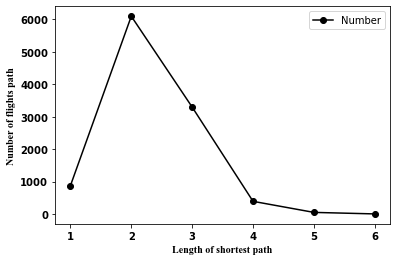

In [12]:
#shortest path
list_a_1=[1,2,3,4,5,6]
list_b_1=[871,6099,3296,388,47,0]
plt.plot(list_a_1,list_b_1,'k-o')
plt.xlabel('Length of shortest path',fontname='Times New Roman',weight="bold")
plt.ylabel('Number of flights path',fontname='Times New Roman',weight="bold")
plt.legend(['Number'])
plt.savefig('flight_route_frequency_vs_shortest_path.pdf') 
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()


In [15]:
#Average shortest path#
avg_sht_pth_len=nx.average_shortest_path_length(G, weight=None)
print('L:',avg_sht_pth_len)

L: 2.0079232693911595


In [13]:
#Average degree per node <k>
llist=[]
for i in a_list :
    degree_1=G.in_degree(i[0])
    llist.append(degree_1)
print("total in degree",sum(llist))
avg_in_degree=sum(llist)/109;
print("<k>",avg_in_degree)

total in degree 873
<k> 8.009174311926605


In [14]:
cls_coff=nx.average_clustering(G)
print("C :",cls_coff)

C : 0.6148469415447767
